<a href="https://colab.research.google.com/github/kumarsurendra10/LAB-03-ASSIGNMENT/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image


data = pd.read_csv('dataR2.csv')

In [ ]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [ ]:
data['Classification'] = data['Classification'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
X = data.drop(columns=['Classification'])
y = data['Classification']
chi_scores, _ = chi2(X, y)

least_important_feature = X.columns[chi_scores.argmin()]
X = X.drop(columns=[least_important_feature])

print("The least important feature based on Chi-Square is:", least_important_feature)
print("Updated dataset after discarding the least important feature:")
X.head()

The least important feature based on Chi-Square is: Leptin
Updated dataset after discarding the least important feature:


,Age,BMI,Glucose,Insulin,HOMA,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,4.819240,10.57635,773.920


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 92
Testing set size: 24


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:",f1)

Confusion Matrix:
[[9 3]
 [3 9]]

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1: 0.75


In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_log_loss = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_entropy.fit(X_train, y_train)
dt_log_loss.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)
y_pred_log_loss = dt_log_loss.predict(X_test)

conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
conf_matrix_log_loss = confusion_matrix(y_test, y_pred_log_loss)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)
log_loss_entropy = log_loss(y_test, dt_entropy.predict_proba(X_test))

accuracy_log_loss = accuracy_score(y_test, y_pred_log_loss)
precision_log_loss = precision_score(y_test, y_pred_log_loss)
recall_log_loss = recall_score(y_test, y_pred_log_loss)
f1_log_loss = f1_score(y_test, y_pred_log_loss)
log_loss_log_loss = log_loss(y_test, dt_log_loss.predict_proba(X_test))

print("Entropy")
print("Confusion Matrix:")
print(conf_matrix_entropy)
print("Accuracy:", accuracy_entropy)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1:",f1_entropy)
print("Log Loss:", log_loss_entropy)

print("\nLog Loss")
print("Confusion Matrix:")
print(conf_matrix_log_loss)
print("Accuracy:", accuracy_log_loss)
print("Precision:", precision_log_loss)
print("Recall:", recall_log_loss)
print("F1:",f1_log_loss)
print("Log Loss:", log_loss_log_loss)

Entropy
Confusion Matrix:
[[11  1]
 [ 1 11]]
Accuracy: 0.9166666666666666
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1: 0.9166666666666666
Log Loss: 3.0036377824264293

Log Loss
Confusion Matrix:
[[9 3]
 [3 9]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1: 0.75
Log Loss: 9.010913347279288


In [ ]:
param_grid = {
    'max_depth': [10, 100],
    'min_samples_split': [4, 6, 8],
    'max_features': ["auto", "sqrt", "log2"]
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Grid Search Results:")
print("Best Parameters:", best_params)
print("Best Model:", best_model)

y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nBest Model Evaluation:")
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Grid Search Results:
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6}
Best Model: DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=6,
                       random_state=42)

Best Model Evaluation:
Confusion Matrix:
[[10  2]
 [ 4  8]]

Accuracy: 0.75
Precision: 0.8
Recall: 0.6666666666666666
F1: 0.7272727272727272


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


Decision Tree Table:
|--- Glucose <= 91.50
|   |--- Insulin <= 3.79
|   |   |--- MCP.1 <= 246.46
|   |   |   |--- class: 0
|   |   |--- MCP.1 >  246.46
|   |   |   |--- Age <= 63.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  63.50
|   |   |   |   |--- Insulin <= 3.02
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Insulin >  3.02
|   |   |   |   |   |--- class: 0
|   |--- Insulin >  3.79
|   |   |--- HOMA <= 5.79
|   |   |   |--- Resistin <= 14.23
|   |   |   |   |--- class: 0
|   |   |   |--- Resistin >  14.23
|   |   |   |   |--- BMI <= 30.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BMI >  30.03
|   |   |   |   |   |--- class: 0
|   |   |--- HOMA >  5.79
|   |   |   |--- class: 1
|--- Glucose >  91.50
|   |--- Age <= 65.50
|   |   |--- Adiponectin <= 2.28
|   |   |   |--- class: 0
|   |   |--- Adiponectin >  2.28
|   |   |   |--- BMI <= 35.81
|   |   |   |   |--- HOMA <= 0.74
|   |   |   |   |   |--- Glucose <= 97.50
|   |   |   |   |   |   |--- class

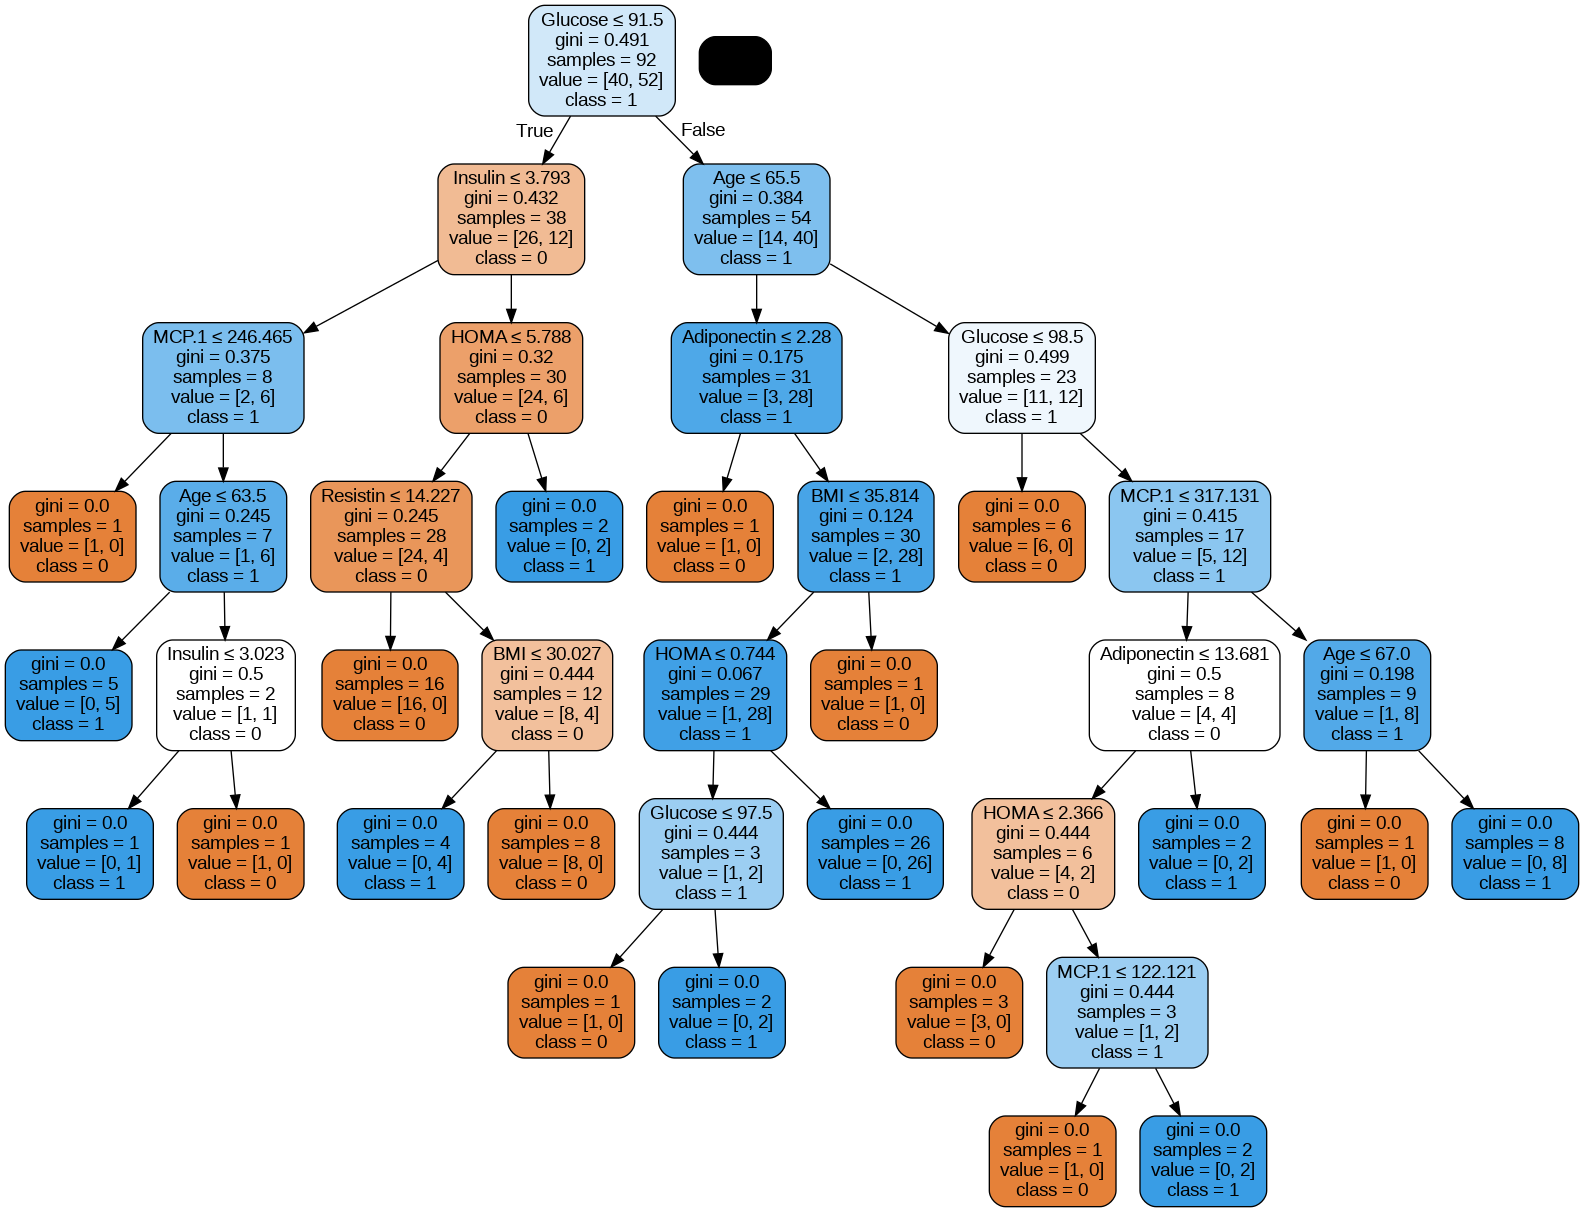

In [ ]:

# Text
tree_table = export_text(dt, feature_names=X.columns.tolist())

print("\nDecision Tree Table:")
print(tree_table)


# Picture (Graphical Representation)
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns.tolist(), class_names=['0', '1'],filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('decision_tree.png')

Image('decision_tree.png')

In [9]:
# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 2: Download the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Convert pixels into floating-point values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 4: Understand the structure of the dataset
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Test data shape:", x_test.shape)       # (10000, 28, 28)
print("Number of classes:", len(np.unique(y_train)))  # 10 unique classes

# Step 5: Visualize the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Step 6: Form the Input, hidden, and output layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer (flatten the 28x28 images)
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    tf.keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes)
])

# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 8: Fit the model
model.fit(x_train, y_train, epochs=5)

# Step 9: Find Accuracy of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:',test_acc)


SyntaxError: invalid non-printable character U+00A0 (<ipython-input-9-aef7d1130bc6>, line 47)